In [96]:
import xarray as xr # Reading netcdf data and manipulating any data
import numpy as np # numbers or maths
import matplotlib.pyplot as plt # plotting
import cartopy.crs as ccrs # plotting maps
import pandas as pd # excel data, tabular, txt
## learn scipy, python os, glob, 

In [103]:
%%sh
for i in {2016..2017}
do
    #wget -q "https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.day.mean.${i}.v2.nc"
    #curl -s "https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.day.mean.${i}.v2.nc"
done

Task exception was never retrieved
future: <Task finished name='Task-180' coro=<ScriptMagics.shebang.<locals>._handle_stream() done, defined at /Users/syed44/miniconda3/envs/pcf/lib/python3.10/site-packages/IPython/core/magics/script.py:211> exception=UnicodeDecodeError('utf-8', b'\x89HDF\r\n', 0, 1, 'invalid start byte')>
Traceback (most recent call last):
  File "/Users/syed44/miniconda3/envs/pcf/lib/python3.10/site-packages/IPython/core/magics/script.py", line 213, in _handle_stream
    line = (await stream.readline()).decode("utf8")
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte


Process is interrupted.


In [104]:
ds = xr.open_mfdataset("sst.day*nc")

In [106]:
5*365

1825

In [105]:
ds

<xarray.Dataset>
Dimensions:  (time: 1826, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2015-12-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(365, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    history:        Thu Aug 24 13:50:24 2017: ncatted -O -a References,global...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....

In [107]:
ds = xr.open_dataset("sst.day.mean.2014.v2.nc")

In [110]:
ds.lat[1]-ds.lat[0]

<xarray.DataArray 'lat' ()>
array(0.25, dtype=float32)

In [111]:
0.25*110

27.5

In [113]:
#~25km resolution

In [ ]:
0.25*0.25 area

In [ ]:
smallest_pixel = 0.25*0.25

In [108]:
ds

<xarray.Dataset>
Dimensions:  (time: 365, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-01-02 ... 2014-12-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    history:        Thu Aug 24 13:51:51 2017: ncatted -O -a References,global...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....

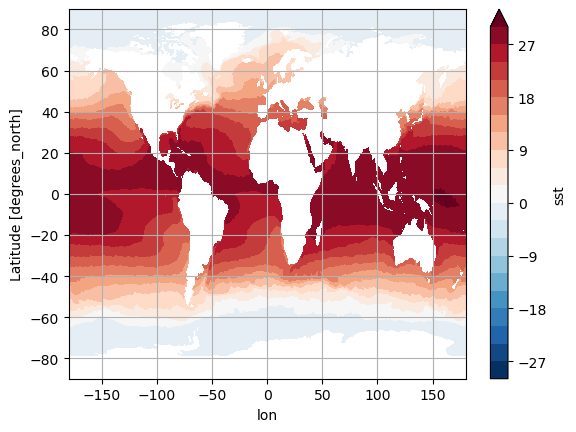

In [145]:
ds['sst'].mean("time").plot.contourf(levels = range(-30, 31, 3))
plt.grid()

In [129]:
print(np.ceil(ds.lon.max().values))
print(np.floor(ds.lon.min().values))

360.0
0.0


In [118]:
ds.time

<xarray.DataArray 'time' (time: 365)>
array(['2014-01-01T00:00:00.000000000', '2014-01-02T00:00:00.000000000',
       '2014-01-03T00:00:00.000000000', ..., '2014-12-29T00:00:00.000000000',
       '2014-12-30T00:00:00.000000000', '2014-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-01-02 ... 2014-12-31
Attributes:
    long_name:     Time
    delta_t:       0000-00-01 00:00:00
    avg_period:    0000-00-01 00:00:00
    axis:          T
    actual_range:  [78162. 78526.]

Now we can see its longitudes are not properly aligned, so let's correct those

In [70]:
def align_coords(ds):
    ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
    ds = ds.sortby(["lat", "lon"])
    return ds

In [130]:
ds = align_coords(ds)

In [73]:
ds

<xarray.Dataset>
Dimensions:  (time: 1826, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-01-02 ... 2015-12-31
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Data variables:
    sst      (time, lat, lon) float32 dask.array<chunksize=(365, 720, 1440), meta=np.ndarray>
Attributes:
    Conventions:    CF-1.5
    title:          NOAA High-resolution Blended Analysis: Daily Values using...
    institution:    NOAA/NCDC
    source:         NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/pub/OI-daily-v2/
    comment:        Reynolds, et al., 2007: Daily High-Resolution-Blended Ana...
    history:        Thu Aug 24 13:50:24 2017: ncatted -O -a References,global...
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....

In [131]:
import cartopy.crs as ccrs
import cartopy.feature as feat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

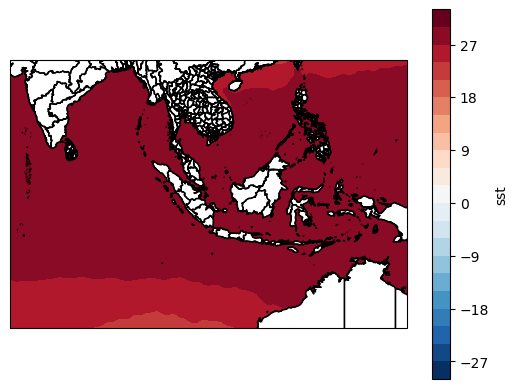

In [135]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree())
ds['sst'].mean("time").plot.contourf(levels = range(-30, 35, 3), ax=ax)
ax.coastlines()
ax.add_feature(feat.BORDERS)
ax.add_feature(feat.STATES.with_scale("10m"))
ax.set_extent([70, 140, -20, 20])


In [81]:
sst = ds.sst

This is time series of lon = slice(90,140), lat = slice(-12,8)

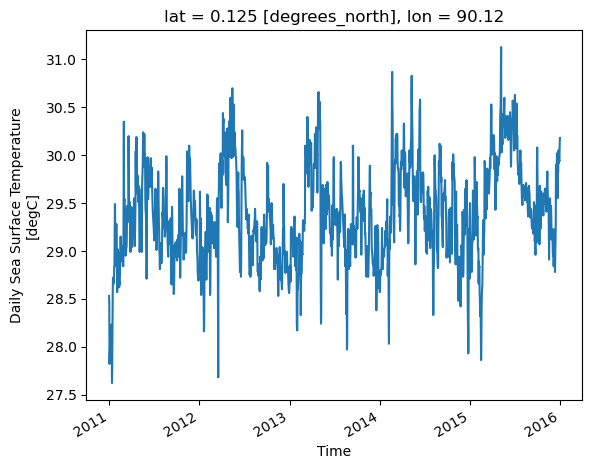

In [102]:
sst.sel(lat = 0, lon = 90, method = "nearest").plot()

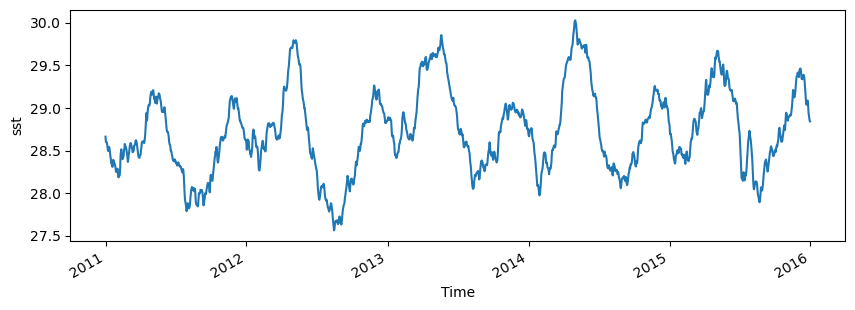

In [146]:
sst.sel(lon = slice(90,140), lat = slice(-15,15)).mean(['lat','lon']).plot(figsize = [10, 3])

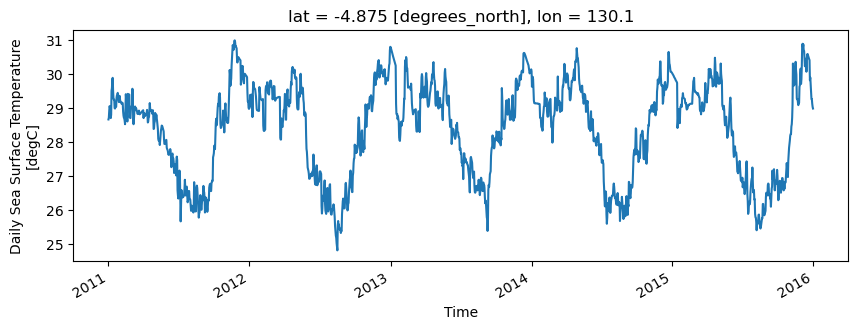

In [92]:
sst.sel(lon = 130, lat = -5, method = "nearest").plot(figsize = [10, 3])

Lets plot temporal mean plot

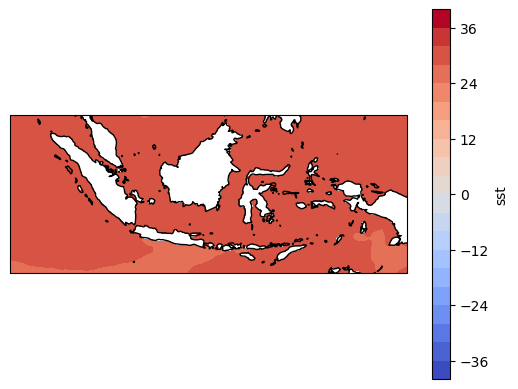

In [89]:
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree())
sst.sel(lon = slice(90,140), lat = slice(-12,8)).mean("time").plot.contourf(ax = ax,
                                                                                   levels = range(-40, 41, 4),
                                                                                   cmap = "coolwarm")
ax.coastlines()

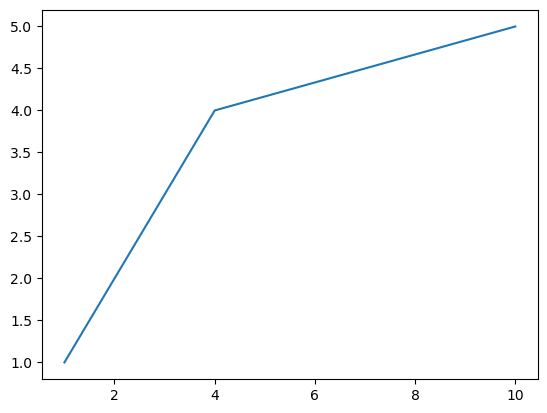

In [94]:
plt.plot([1,2,3,4,10],[1,2,3,4,5])

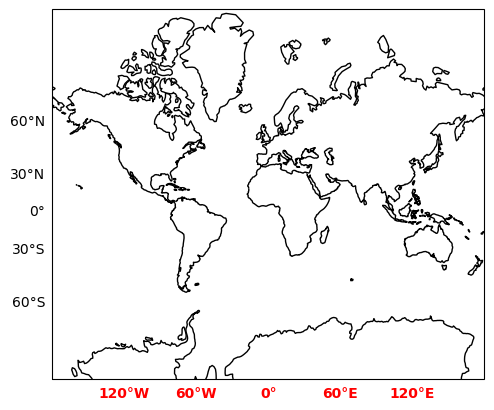

In [144]:
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.xlabels_bottom = True
gl.ylabels_right = False
gl.xlines = False
gl.ylines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
plt.show()